## Importations

In [22]:
# Run Keras on CPU
import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"   # see issue #152
os.environ["CUDA_VISIBLE_DEVICES"] = "0"         # -1 if CPU

In [23]:
# Importations
import sys
sys.path.append('..')

from config import *
import CPutils
import feature_extraction

In [24]:
# Plots style
def plt_style(titlesize=16,
              labelsize=14,
              legendsize=12,
              fontsize=14,
              figsize=(15,10)):
    # Font sizes
    plt.rcParams['font.size'] = fontsize
    plt.rcParams['axes.labelsize'] = labelsize
    plt.rcParams['axes.titlesize'] = titlesize
    plt.rcParams['xtick.labelsize'] = labelsize
    plt.rcParams['ytick.labelsize'] = labelsize
    plt.rcParams['legend.fontsize'] = fontsize
    plt.rcParams['figure.titlesize'] = titlesize

    # Figure size
    plt.figure(1)
    plt.figure(figsize = figsize) 

    # axes
    ax = plt.subplot(111)                    
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)
    ax.get_xaxis().tick_bottom()  
    ax.get_yaxis().tick_left() 
    
    # Return axis
    return ax

## Load consolidated file
- Consolidated excel file containing all images data

In [106]:
# Load
DATA_PATH = os.path.join('..', 'data')
topoClasses = pd.read_excel(os.path.join(DATA_PATH, 'Topology.xlsx'))

In [107]:
# Quick check
print("Dim:", topoClasses.shape)
topoClasses.head()

Dim: (28268, 29)


,id,Lat,Long,n_inc,lcV0,lcV1,lcV2,lcV3,lcV4,lcV5,...,topo_set,old_file_name,new_file_name_fire,n_inc_fut,future_fire,same_cat_past_future,fire_past_and_future,no_fire_past_and_fire_future,fire_past_or_future,new_file_name_anyfire
0,0,-34.95737,-71.23599,1,0.0,0.741789,0.027180,0.040770,0.072480,0.108720,...,1,ID0.tif,1_0,0,0,0,0,0,1,1_0
1,1,-35.74074,-72.54228,1,0.0,0.031285,0.109497,0.445810,0.127374,0.253631,...,1,ID1.tif,1_1,0,0,0,0,0,1,1_1
2,2,-39.08127,-72.69741,0,0.0,0.232086,0.245989,0.014973,0.451337,0.055615,...,1,ID2.tif,0_2,0,0,1,0,0,0,0_2
3,3,-33.63171,-70.74399,0,0.0,0.673143,0.027429,0.000000,0.029714,0.221714,...,1,ID3.tif,0_3,0,0,1,0,0,0,0_3
4,4,-39.35782,-72.66719,0,0.0,0.023479,0.804696,0.119530,0.046958,0.005336,...,1,ID4.tif,0_4,0,0,1,0,0,0,0_4


In [108]:
Cols = topoClasses.columns
Cols

Index(['id', 'Lat', 'Long', 'n_inc', 'lcV0', 'lcV1', 'lcV2', 'lcV3', 'lcV4',
       'lcV5', 'lcV6', 'lcV7', 'lcV8', 'lcV9', 'lcV10', 'lcV11', 'lcVSUM',
       'fire', 'new_id', 'topo_set', 'old_file_name', 'new_file_name_fire',
       'n_inc_fut', 'future_fire', 'same_cat_past_future',
       'fire_past_and_future', 'no_fire_past_and_fire_future',
       'fire_past_or_future', 'new_file_name_anyfire'],
      dtype='object')

In [109]:
# Select features
features = ['id', 'Lat', 'Long', 
            'lcV0', 'lcV1', 'lcV2', 'lcV3', 'lcV4',
            'lcV5', 'lcV6', 'lcV7', 'lcV8', 'lcV9', 
            'lcV10', 'lcV11', 'topo_set', 
            'new_id', 'same_cat_past_future',  'no_fire_past_and_fire_future', 
            'fire_past_and_future', 'old_file_name', 
            'new_file_name_fire', 'n_cover',
            'n_inc', 'n_inc_fut', 
            'fire', 'future_fire', 'fire_past_or_future', 
            'new_file_name_anyfire',]

# Create n_cover variable
expression = 'n_cover = ' 
aux_exp = ['(lcV' + str(i) + ' > 0) * 1' for i in range(0, 11)]
expression  += ' + '.join(aux_exp)
topoClasses.eval(expression, inplace=True)

# Features
topoClasses = topoClasses[features] 
topoClasses

,id,Lat,Long,lcV0,lcV1,lcV2,lcV3,lcV4,lcV5,lcV6,...,fire_past_and_future,old_file_name,new_file_name_fire,n_cover,n_inc,n_inc_fut,fire,future_fire,fire_past_or_future,new_file_name_anyfire
0,0,-34.95737,-71.23599,0.0,0.741789,0.027180,0.040770,0.072480,0.108720,0.000000,...,0,ID0.tif,1_0,6,1,0,1,0,1,1_0
1,1,-35.74074,-72.54228,0.0,0.031285,0.109497,0.445810,0.127374,0.253631,0.000000,...,0,ID1.tif,1_1,6,1,0,1,0,1,1_1
2,2,-39.08127,-72.69741,0.0,0.232086,0.245989,0.014973,0.451337,0.055615,0.000000,...,0,ID2.tif,0_2,5,0,0,0,0,0,0_2
3,3,-33.63171,-70.74399,0.0,0.673143,0.027429,0.000000,0.029714,0.221714,0.000000,...,0,ID3.tif,0_3,6,0,0,0,0,0,0_3
4,4,-39.35782,-72.66719,0.0,0.023479,0.804696,0.119530,0.046958,0.005336,0.000000,...,0,ID4.tif,0_4,5,0,0,0,0,0,0_4
5,5,-32.72447,-70.70610,0.0,0.456647,0.023121,0.001156,0.031214,0.484393,0.000000,...,0,ID5.tif,0_5,6,0,0,0,0,0,0_5
6,6,-39.88611,-72.78719,0.0,0.028361,0.509454,0.036765,0.420168,0.005252,0.000000,...,0,ID6.tif,0_6,5,0,0,0,0,0,0_6
7,7,-39.23191,-72.63831,0.0,0.000000,0.537887,0.442903,0.017076,0.002134,0.000000,...,0,ID7.tif,0_7,4,0,0,0,0,0,0_7
8,8,-37.01430,-73.16671,0.0,0.070022,0.055799,0.088621,0.447484,0.121444,0.000000,...,1,ID8.tif,1_8,8,12,4,1,1,1,1_8
9,9,-40.32280,-72.46389,0.0,0.002094,0.068063,0.001047,0.913089,0.011518,0.000000,...,0,ID9.tif,0_9,6,0,0,0,0,0,0_9


<Figure size 432x288 with 0 Axes>

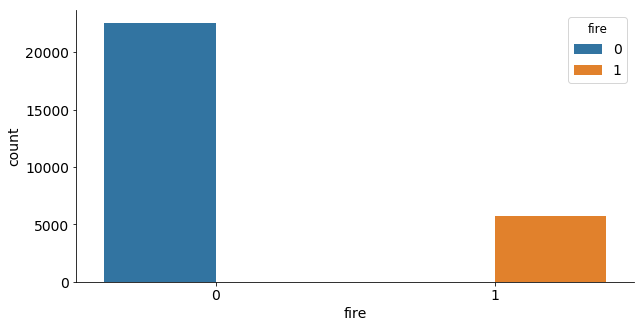

In [110]:
# Counting
plt_style(figsize=(10,5))
sns.countplot(data=topoClasses, hue='fire', x='fire')

<Figure size 432x288 with 0 Axes>

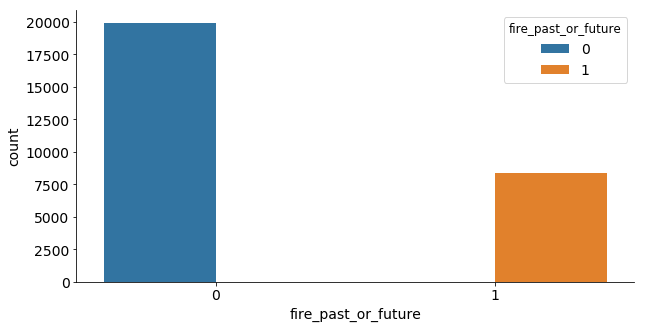

In [111]:
# Counting
plt_style(figsize=(10,5))
sns.countplot(data=topoClasses, hue='fire_past_or_future', x='fire_past_or_future')

# Components analysis

## Auxiliary functions to calculate the total number of components per image

In [112]:
maxRow = 500
maxCol = 500
visited = np.zeros((maxCol, maxRow)) 

# Function that return true if mat[row][col] 
# is valid and hasn't been visited 
def isSafe(M, row, col, c, n, l): 
                                        
    # If row and column are valid and element 
    # is matched and hasn't been visited then 
    # the cell is safe 
    return ((row >= 0 and row < n) and \
            (col >= 0 and col < l) and \
            (M[row][col] == c and not \
             visited[row][col]))

# Function for depth first search 
def DFS(M, row, col, c, n, l, nn=4): 

    # These arrays are used to get row 
    # and column numbers of 4 neighbours 
    # of a given cell 
    if nn == 4:
        rowNbr = [ -1, 1, 0, 0 ] 
        colNbr = [ 0, 0, 1, -1 ]
    elif nn == 8:
        rowNbr = [-1, -1, -1,  0, 0,  1, 1, 1]; 
        colNbr = [-1,  0,  1, -1, 1, -1, 0, 1]; 
    else:
        raise ValueError

    # Mark this cell as visited 
    visited[row][col] = True; 

    # Recur for all connected neighbours 
    for k in range(nn) : 
        if (isSafe(M, row + rowNbr[k], col + colNbr[k], c, n, l)): 
            DFS(M, row + rowNbr[k], col + colNbr[k], c, n, l) 

# Function to return the number of 
# connectewd components in the matrix 
def connectedComponents(M, n, nn=4): 
    connectedComp = 0; 
    l = len(M[0]); 

    for i in range(n): 
        for j in range(l): 
            if (not visited[i][j]): 
                c = M[i][j]; 
                DFS(M, i, j, c, n, l, nn)
                connectedComp += 1 

    return connectedComp

[[192 192 192 ... 192 192 192]
 [192 192 192 ... 192 192 192]
 [192 192 192 ... 192 192 192]
 ...
 [128 128 255 ...   0   0   0]
 [ 64  64  64 ...   0   0   0]
 [255  64  64 ...   0   0   0]]
Components: 120


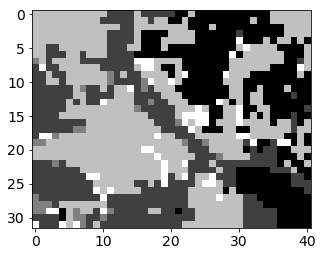

In [113]:
# No Fire example
I = cv2.imread(os.path.join(DATA_PATH, 'dataset', '0_2.png'), 0)
plt.imshow(I, cmap='gray')
print(I)
n = I.shape[0]
visited = np.zeros((maxCol, maxRow)) 
print("Components:", connectedComponents(I, n, nn=4)) 

[[  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [  0   0   0 ... 128 128   0]
 [  0   0   0 ...  96  96   0]
 [  0   0   0 ...  96  96 224]]
Components: 101


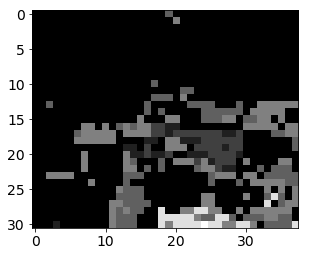

In [114]:
# Fire Example
I = cv2.imread(os.path.join(DATA_PATH, 'dataset', '1_0.png'), 0)
plt.imshow(I, cmap='gray')
print(I)
n = I.shape[0]
visited = np.zeros((maxCol, maxRow)) 
print("Components:", connectedComponents(I, n)) 

In [115]:
# All components (4 neighbors)
p = os.path.join(DATA_PATH, 'dataset')
imagePaths = sorted(list(CPutils.paths.list_images(p)))

# Record number of components
imgname = []
ncomponents = []
imgcomponents = {}
for imagePath in imagePaths:
    I = cv2.imread(imagePath, 0)
    n = I.shape[0]
    visited = np.zeros((maxCol, maxRow)) 
    ncomponents.append(connectedComponents(I, n))
    imgname.append(imagePath.split(os.path.sep)[-1])
    imgcomponents[imgname[-1]] = ncomponents[-1]

In [116]:
# All components (8 neighbors)
p = os.path.join(DATA_PATH, 'dataset')
imagePaths = sorted(list(CPutils.paths.list_images(p)))

# Record number of components
ncomponents8 = []
imgcomponents8 = {}
for idx,imagePath in enumerate(imagePaths):
    I = cv2.imread(imagePath, 0)
    n = I.shape[0]
    visited = np.zeros((maxCol, maxRow)) 
    ncomponents8.append(connectedComponents(I, n, nn=8))
    imgcomponents8[imgname[idx]] = ncomponents8[-1]

In [117]:
# Stats
print("Mean:", np.mean(ncomponents),
      "\nMax:", np.max(ncomponents),
      "\nmin:", np.min(ncomponents),
      "\nstd:", np.std(ncomponents))

Mean: 105.82085750672138 
Max: 411 
min: 1 
std: 57.31712875119651


In [118]:
# Stats (8 neighbors)
print("Mean:", np.mean(ncomponents8),
      "\nMax:", np.max(ncomponents8),
      "\nmin:", np.min(ncomponents8),
      "\nstd:", np.std(ncomponents8))

Mean: 94.22583840384887 
Max: 349 
min: 1 
std: 49.85783462688228


C:\Users\CPais\AppData\Local\conda\conda\envs\DeepLearning\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


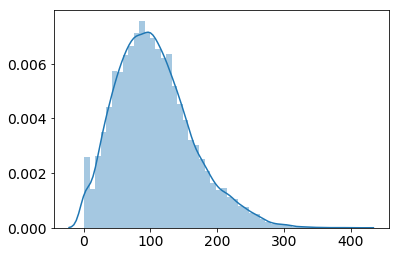

In [119]:
# Distplot 4 neighbors
sns.distplot(np.array(ncomponents))

C:\Users\CPais\AppData\Local\conda\conda\envs\DeepLearning\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


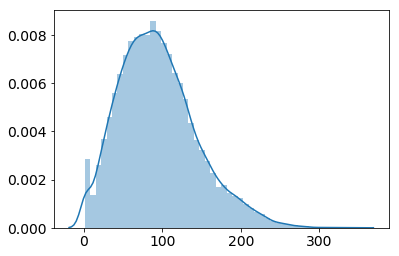

In [120]:
# Distplot 8 neighbors
sns.distplot(np.array(ncomponents8))

In [121]:
# Populate the excel file with new column
orderedComps = []
for row in range(topoClasses.shape[0]):
    orderedComps.append(imgcomponents[topoClasses.iloc[row, -1] + '.png'])
orderedComps = np.array(orderedComps)

In [122]:
# Populate the excel file with new column
orderedComps8 = []
for row in range(topoClasses.shape[0]):
    orderedComps8.append(imgcomponents8[topoClasses.iloc[row, -1] + '.png'])
orderedComps8 = np.array(orderedComps8)

In [123]:
# Check
orderedComps

array([101, 151, 120, ..., 229, 162, 200])

In [124]:
# Check
orderedComps8

array([ 95, 135, 113, ..., 199, 146, 175])

In [125]:
# Create new column
topoClasses['n_comp'] = orderedComps

In [126]:
# Create new column
topoClasses['n_comp8'] = orderedComps8

In [127]:
# Check
topoClasses.head()

,id,Lat,Long,lcV0,lcV1,lcV2,lcV3,lcV4,lcV5,lcV6,...,new_file_name_fire,n_cover,n_inc,n_inc_fut,fire,future_fire,fire_past_or_future,new_file_name_anyfire,n_comp,n_comp8
0,0,-34.95737,-71.23599,0.0,0.741789,0.027180,0.040770,0.072480,0.108720,0.0,...,1_0,6,1,0,1,0,1,1_0,101,95
1,1,-35.74074,-72.54228,0.0,0.031285,0.109497,0.445810,0.127374,0.253631,0.0,...,1_1,6,1,0,1,0,1,1_1,151,135
2,2,-39.08127,-72.69741,0.0,0.232086,0.245989,0.014973,0.451337,0.055615,0.0,...,0_2,5,0,0,0,0,0,0_2,120,113
3,3,-33.63171,-70.74399,0.0,0.673143,0.027429,0.000000,0.029714,0.221714,0.0,...,0_3,6,0,0,0,0,0,0_3,119,107
4,4,-39.35782,-72.66719,0.0,0.023479,0.804696,0.119530,0.046958,0.005336,0.0,...,0_4,5,0,0,0,0,0,0_4,61,53


In [128]:
# Save
topoClasses.to_excel(os.path.join(DATA_PATH, 'Topology_ncomp.xlsx'))

C:\Users\CPais\AppData\Local\conda\conda\envs\DeepLearning\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<Figure size 432x288 with 0 Axes>

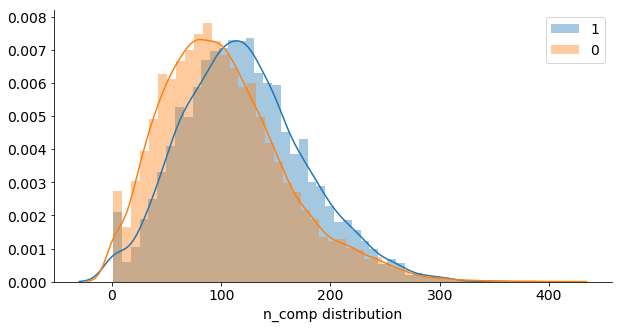

In [129]:
# Number of components distribution per group
plt_style(figsize=(10,5))
ax = sns.distplot(topoClasses[topoClasses['fire'] == 1]['n_comp'])
ax2 = sns.distplot(topoClasses[topoClasses['fire'] == 0]['n_comp'], axlabel='n_comp distribution')
ax.legend('10')

C:\Users\CPais\AppData\Local\conda\conda\envs\DeepLearning\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<Figure size 432x288 with 0 Axes>

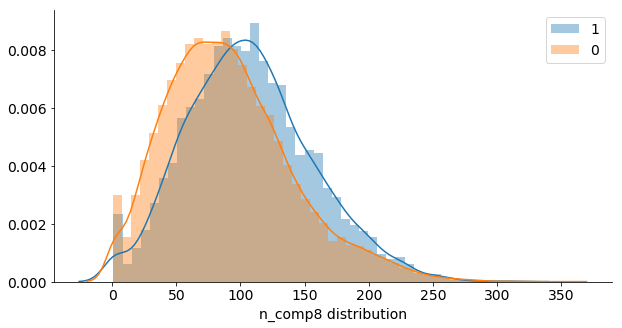

In [130]:
# Number of components distribution per group
plt_style(figsize=(10,5))
ax = sns.distplot(topoClasses[topoClasses['fire'] == 1]['n_comp8'])
ax2 = sns.distplot(topoClasses[topoClasses['fire'] == 0]['n_comp8'], axlabel='n_comp8 distribution')
ax.legend('10')

<Figure size 432x288 with 0 Axes>

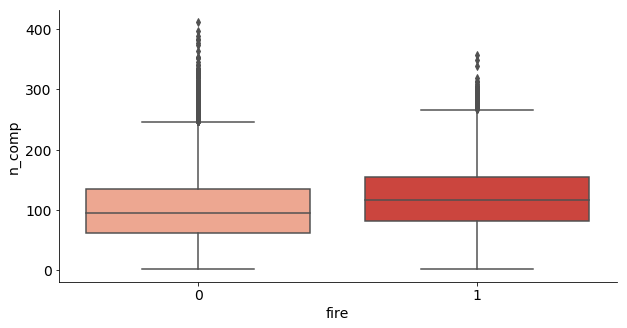

In [131]:
plt_style(figsize=(10,5))
sns.boxplot(data=topoClasses, x='fire', y='n_comp', palette='Reds')

<Figure size 432x288 with 0 Axes>

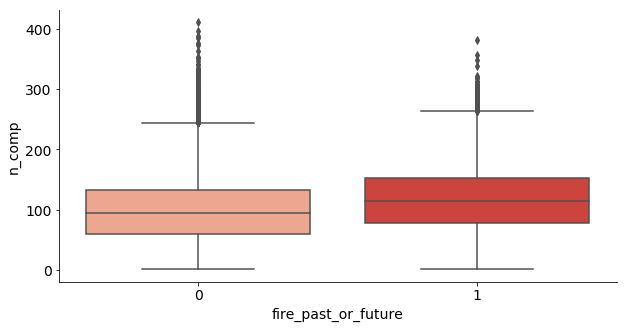

In [132]:
plt_style(figsize=(10,5))
sns.boxplot(data=topoClasses, x='fire_past_or_future', y='n_comp', palette='Reds')

<Figure size 432x288 with 0 Axes>

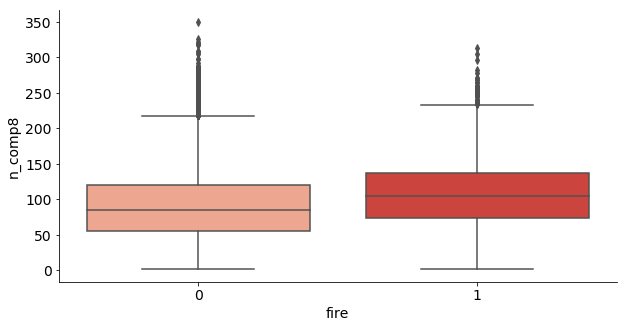

In [133]:
plt_style(figsize=(10,5))
sns.boxplot(data=topoClasses, x='fire', y='n_comp8', palette='Reds')

<Figure size 432x288 with 0 Axes>

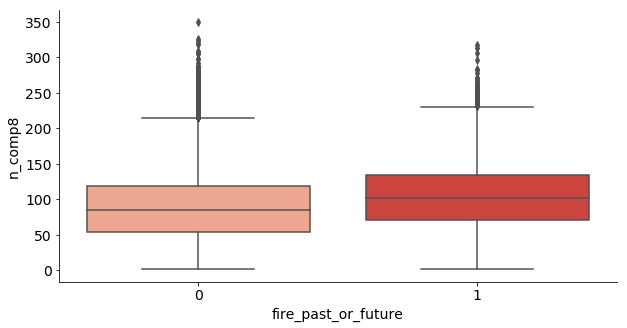

In [134]:
plt_style(figsize=(10,5))
sns.boxplot(data=topoClasses, x='fire_past_or_future', y='n_comp8', palette='Reds')